### Rename Columns for Consistency

In [29]:
import pandas as pd
# Load the dataset
df = pd.read_csv("../data/credit_data.csv",header=1)

In [30]:
df.rename(columns={
    "LIMIT_BAL": "Limit_Balance",
    "SEX": "Gender",
    "EDUCATION": "Education",
    "MARRIAGE": "Marital_Status",
    "AGE": "Age",
    "PAY_0": "Repay_Sept",
    "PAY_2": "Repay_Aug",
    "PAY_3": "Repay_July",
    "PAY_4": "Repay_June",
    "PAY_5": "Repay_May",
    "PAY_6": "Repay_April",
    "BILL_AMT1": "Bill_Sept",
    "BILL_AMT2": "Bill_Aug",
    "BILL_AMT3": "Bill_July",
    "BILL_AMT4": "Bill_June",
    "BILL_AMT5": "Bill_May",
    "BILL_AMT6": "Bill_April",
    "PAY_AMT1": "Pay_Sept",
    "PAY_AMT2": "Pay_Aug",
    "PAY_AMT3": "Pay_July",
    "PAY_AMT4": "Pay_June",
    "PAY_AMT5": "Pay_May",
    "PAY_AMT6": "Pay_April",
    "default payment next month": "Default_Next_Month"
}, inplace=True)

df.head()


,ID,Limit_Balance,Gender,Education,Marital_Status,Age,Repay_Sept,Repay_Aug,Repay_July,Repay_June,...,Bill_June,Bill_May,Bill_April,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Default_Next_Month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [31]:
df["Gender"] = df["Gender"].map({1: "Male", 2: "Female"})


In [32]:
df["Education"] = df["Education"].replace({1: "Graduate", 2: "University", 3: "High School", 4: "Other", 5: "Other", 6: "Other"})


In [33]:
df["Marital_Status"] = df["Marital_Status"].replace({1: "Married", 2: "Single", 3: "Other"})


In [34]:
df.head()

,ID,Limit_Balance,Gender,Education,Marital_Status,Age,Repay_Sept,Repay_Aug,Repay_July,Repay_June,...,Bill_June,Bill_May,Bill_April,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Default_Next_Month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


C:\Users\admroot\AppData\Local\Temp\ipykernel_15768\3092783342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Default_Next_Month"], palette="coolwarm")


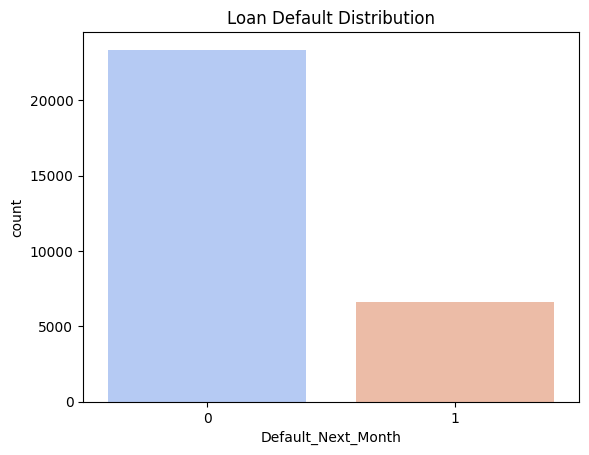

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Default_Next_Month"], palette="coolwarm")
plt.title("Loan Default Distribution")
plt.show()


In [36]:
df_encoded = pd.get_dummies(df, columns=["Gender", "Education", "Marital_Status"], drop_first=True)

df_encoded.head()


,ID,Limit_Balance,Age,Repay_Sept,Repay_Aug,Repay_July,Repay_June,Repay_May,Repay_April,Bill_Sept,...,Pay_April,Default_Next_Month,Gender_Male,Education_Graduate,Education_High School,Education_Other,Education_University,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,1,False,False,False,False,True,True,False,False
1,2,120000,26,-1,2,0,0,0,2,2682,...,2000,1,False,False,False,False,True,False,False,True
2,3,90000,34,0,0,0,0,0,0,29239,...,5000,0,False,False,False,False,True,False,False,True
3,4,50000,37,0,0,0,0,0,0,46990,...,1000,0,False,False,False,False,True,True,False,False
4,5,50000,57,-1,0,-1,0,0,0,8617,...,679,0,True,False,False,False,True,True,False,False


In [39]:
df_encoded.to_csv("../data/cleaned_credit_data.csv", index=False)

In [37]:
df_encoded.columns


Index(['ID', 'Limit_Balance', 'Age', 'Repay_Sept', 'Repay_Aug', 'Repay_July',
       'Repay_June', 'Repay_May', 'Repay_April', 'Bill_Sept', 'Bill_Aug',
       'Bill_July', 'Bill_June', 'Bill_May', 'Bill_April', 'Pay_Sept',
       'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April',
       'Default_Next_Month', 'Gender_Male', 'Education_Graduate',
       'Education_High School', 'Education_Other', 'Education_University',
       'Marital_Status_Married', 'Marital_Status_Other',
       'Marital_Status_Single'],
      dtype='object')

In [13]:
!pip install imblearn
!pip install scikit-learn

### Option 1: Oversampling with SMOTE

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features & target
X = df.drop(columns=["Default_Next_Month"])
y = df["Default_Next_Month"]

# Split data before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class balance
import collections
print("Before SMOTE:", collections.Counter(y_train))
print("After SMOTE:", collections.Counter(y_train_resampled))


ValueError: could not convert string to float: 'Female'